In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from datetime import datetime

%matplotlib inline

In [138]:
filepath1 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/Crunchbase Data.csv")
crunchbase_data = pd.read_csv(filepath1, parse_dates=[0])
crunchbase_data["Announced Date"] = pd.to_datetime(crunchbase_data["Announced Date"])
crunchbase_data["Announced Year"] = crunchbase_data['Announced Date'].dt.year
crunchbase_data = crunchbase_data.set_index("Sl. No.")

crunchbase_data.head()
crunchbase_data.head(-5)

,Transaction Name,Organization Industry,Organization Location,Funding Type,Money Raised,Announced Date,Announced Year,Funding Status,Total Funding Amount
Sl. No.,,,,,,,,,
1,Series C - Nesto,"Financial Services, FinTech, Real Estate","Montreal, Quebec, Canada, North America",Series C,80000000.0,2022-12-13,2022,Late Stage Venture,151354383.0
2,Private Equity Round - Pomerleau,"Construction, Energy, Real Estate","Quebec, Quebec, Canada, North America",Private Equity,150000000.0,2022-12-07,2022,Private Equity,200000000.0
3,Private Equity Round - Wilkar Property Management,"Property Management, Real Estate","Westmount, Quebec, Canada, North America",Private Equity,NaN,2022-12-07,2022,Private Equity,NaN
4,Grant - Mero Technologies,"Analytics, Internet of Things, Real Estate, So...","Toronto, Ontario, Canada, North America",Grant,1500000.0,2023-01-10,2023,NaN,4800000.0
5,Private Equity Round - TSE Management Services,"Property Management, Real Estate","Richmond Hill, Ontario, Canada, North America",Private Equity,NaN,2022-12-07,2022,Private Equity,NaN
...,...,...,...,...,...,...,...,...,...
532,Post-IPO Equity - RioCan,"Leasing, Real Estate, Rental Property","Toronto, Ontario, Canada, North America",Post-IPO Equity,230000000.0,2019-10-28,2019,NaN,680000000.0
533,Post-IPO Equity - Aston Bay Holdings,"Mining, Precious Metals, Real Estate","Toronto, Ontario, Canada, North America",Post-IPO Equity,NaN,2018-04-26,2018,NaN,109802.0
534,Post-IPO Equity - Mosaic Capital,"Banking, Insurance, Real Estate, Venture Capital","Calgary, Alberta, Canada, North America",Post-IPO Equity,28776336.0,2014-06-20,2014,NaN,54193256.0


In [148]:
print(crunchbase_data["Money Raised"].dtype)

float64


In [153]:
Money_Raised = crunchbase_data[["Announced Year", "Money Raised"]]
Money_Raised.head(15)

,Announced Year,Money Raised
Sl. No.,,
1,2022,80000000.0
2,2022,150000000.0
3,2022,NaN
4,2023,1500000.0
5,2022,NaN
6,2022,5500000.0
7,2022,36000000.0
8,2022,4000000.0
9,2022,2550000.0


In [186]:
Money_Raised = Money_Raised.dropna().copy()
Money_Raised["Money Raised"] = Money_Raised["Money Raised"].div(10000).round(2)
Money_Raised.head(15)

,Announced Year,Money Raised
Sl. No.,,
1,2022,8000.0
2,2022,15000.0
4,2023,150.0
6,2022,550.0
7,2022,3600.0
8,2022,400.0
9,2022,255.0
10,2022,2200.0
11,2022,800.0


In [190]:
Money_Raised_Grouped = Money_Raised.groupby("Announced Year")["Money Raised"].sum()
Money_Raised_Grouped.head(20)

Announced Year
2000       300.00
2006       222.41
2007       910.00
2008      2850.00
2009        88.91
2010       475.00
2011      9929.32
2012      4277.38
2013     37287.35
2014     29869.23
2015     38436.54
2016     61152.64
2017     97195.85
2018    162522.43
2019     89120.70
2020     57508.74
2021    124141.28
2022     70879.87
2023       150.00
Name: Money Raised, dtype: float64

<AxesSubplot:xlabel='Announced Year'>

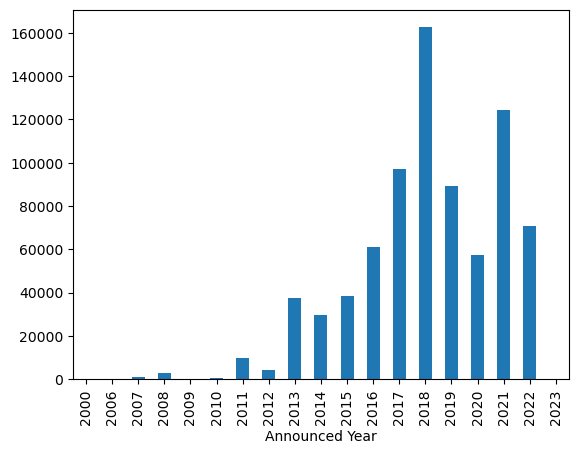

In [188]:
Money_Raised_Grouped.plot(kind='bar', stacked=False)

In [253]:
Money_Raised2 = crunchbase_data[["Announced Year", "Money Raised","Funding Status"]]
Money_Raised2 = Money_Raised2.dropna().copy()
Money_Raised2["Money Raised"] = Money_Raised2["Money Raised"].div(10000).round(2)
Money_Raised2.head(15)

,Announced Year,Money Raised,Funding Status
Sl. No.,,,
1,2022,8000.0,Late Stage Venture
2,2022,15000.0,Private Equity
6,2022,550.0,Seed
7,2022,3600.0,Early Stage Venture
8,2022,400.0,Early Stage Venture
9,2022,255.0,Seed
10,2022,2200.0,Early Stage Venture
12,2018,5000.0,Private Equity
13,2022,810.0,Early Stage Venture


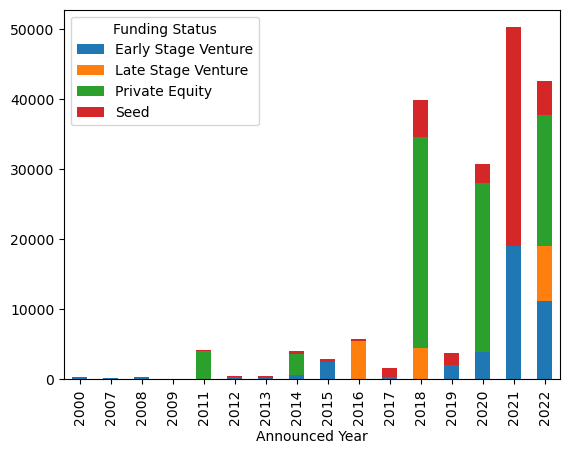

In [259]:
Money_Raised_Grouped2 = Money_Raised2.groupby(["Announced Year","Funding Status"])["Money Raised"].sum().unstack().plot(kind='bar', stacked=True)

In [258]:
filepath2 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/New Housing Developments Data.csv")
New_Developments = pd.read_csv(filepath2,)

New_Developments.head()

,Year,Quarter,New Housing Stats
0,2002,Q1,36140
1,2002,Q2,59160
2,2002,Q3,55730
3,2002,Q4,54004
4,2003,Q1,38270


<AxesSubplot:xlabel='Year'>

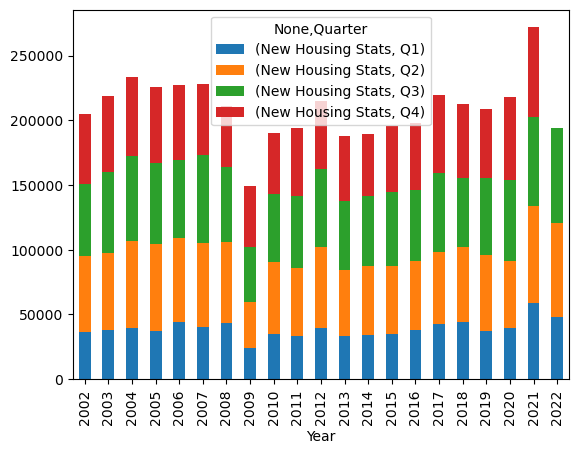

In [169]:
New_Developments.groupby(['Year', 'Quarter']).sum().unstack().plot(kind='bar', stacked=True)

In [212]:
filepath3 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/Resident and Non-Resident Ownership.csv")
rvnr = pd.read_csv(filepath3,)

rvnr.head()

,Geography,Ownership type,Residency status,2020
0,Nova Scotia,Individual,Resident,455530.0
1,Nova Scotia,Individual,Non-resident,27630.0
2,Nova Scotia,Non-individual,Resident,8965.0
3,Nova Scotia,Non-individual,Non-resident,220.0
4,New Brunswick,Individual,Resident,381770.0


AttributeError: 'AxesSubplot' object has no attribute 'head'

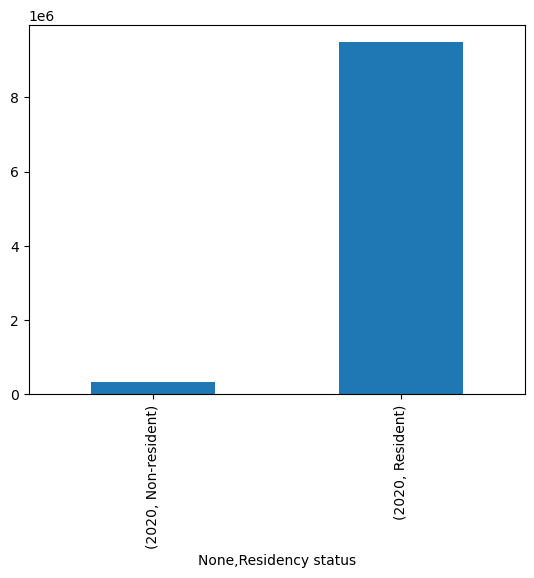

In [217]:
rvnr1 = rvnr.groupby(['Residency status']).sum().unstack().plot(kind='bar', stacked=True)

rvnr1.head(10)

In [235]:
filepath4 = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Project 1/2021 Dwelling Data.csv")
rentvown= pd.read_csv(filepath4)

rentvown.head()

,Ownership,Dwelling Type,2011,2016,2021
0,Owner,Single-detached house,6732800,6858540,7068300
1,Owner,Apartment in a building that has five or more ...,358740,416250,483635
2,Owner,Other attached dwelling,1938600,2107150,2246685
3,Owner,Movable dwelling,155705,159380,157350
4,Rented,Single-detached house,547090,634950,746635


<AxesSubplot:xlabel='Ownership'>

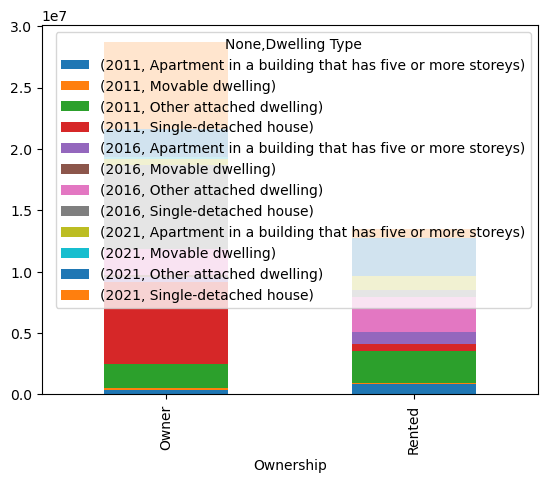

In [228]:
rentvown_group = rentvown.groupby(["Ownership","Dwelling Type"]).sum().unstack().plot(kind='bar', stacked=True)

rentvown_group

In [251]:
rentvown_group2 = rentvown.groupby("Ownership").sum()
plt.plot(